In [275]:
%run greedy_search.ipynb
%run brute_force.ipynb
%run variable_neighborhood_search.ipynb

In [273]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from itertools import accumulate

In [190]:
def load_from_file(filename):
    M=[]
    n=0
    with open(filename,"r") as file:
        lines=file.readlines()
        for line in lines:
            line=line.strip()
            values=tuple(int(x) for x in line.split())
            if n==0:
                n=len(values)
            M.append(values)
    return M,n

In [191]:
def test_gs_large(M,n):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    core_sizes = []
    start=time.time()
    for i in range(20):
        curr_core,_=greedy_search(M,n)
        core_size = len(curr_core)
        avg_core_size+=len(curr_core)
        if core_size>best_core_size:
            best_core_size=core_size
            best_core=curr_core
        core_sizes.append(best_core_size)
    end=time.time()
    print("Greedy search results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/20)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/20,3))
    print("Best core:",best_core)

    plt.figure(figsize=(8, 6))

    sizes,counts=np.unique(core_sizes,return_counts=True)
    
    _=plt.bar(sizes, counts, width=0.8, edgecolor='black')
    
    plt.title('Distribucija veličine Hornovog jezgra tokom 20 pokretanja pohlepne pretrage')
    plt.xlabel('Veličina jezgra')
    plt.ylabel('Frekvencija')
    plt.xticks(ticks=np.arange(min(core_sizes), max(core_sizes) + 1))
    plt.yticks(ticks=range(0, max(counts) + 1))
    
    plt.tight_layout()
    plt.savefig('greedy_performance.png')
    plt.show()
    plt.close()


In [192]:
def test_vns_large(M,n):
    avg_core_size=0
    best_core_size=float('-inf')
    best_core=None
    core_sizes = []
    start=time.time()
    for i in range(20):
        curr_core,_=variable_neighborhood_search(M,50,5,0.5)
        core_size = len(curr_core)
        avg_core_size+=len(curr_core)
        if len(curr_core)>best_core_size:
            best_core_size=len(curr_core)
            best_core=curr_core
        core_sizes.append(best_core_size)
    end=time.time()
    print("Variable neighborhood results: ")
    print("Best core size:",len(best_core))
    print("Avg core size:",avg_core_size/20)
    print("Total time: %ssec" %round(end-start,3))
    print("Avg time: %ssec" %round((end-start)/20,3))
    print("Best core:",best_core)


    plt.figure(figsize=(8, 6))
    sizes,counts=np.unique(core_sizes,return_counts=True)

    _=plt.bar(sizes, counts, width=0.8, edgecolor='black')
    
    plt.title('Distribucija veličine Hornovog jezgra tokom 20 pokretanja VNSa')
    plt.xlabel('Veličina jezgra')
    plt.ylabel('Frekvencija')
    plt.xticks(ticks=np.arange(min(core_sizes),max(core_sizes)+1))
    plt.yticks(ticks=range(0, max(counts) + 1))
    
    plt.tight_layout()
    plt.savefig('vns_performance.png')
    plt.show()


In [193]:
def test_all_large(M,n):
    print("Number of assignments:",len(M))
    print("M:",M)
    print("")
    test_gs_large(M,n)
    print("")
    test_vns_large(M,n)

Number of assignments: 93
M: [(0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 0, 1), (1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 0, 1, 0, 0, 1), (0, 1, 1, 1, 0, 0, 1, 1), (0, 0, 0, 1, 0, 1, 0, 0), (1, 1, 1, 0, 1, 1, 0, 1), (0, 0, 1, 1, 0, 1, 0, 1), (1, 0, 0, 1, 1, 1, 0, 1), (1, 0, 1, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0), (0, 1, 1, 0, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0, 1, 0), (1, 0, 1, 1, 1, 1, 0, 1), (0, 1, 0, 0, 1, 1, 0, 0), (1, 0, 1, 0, 0, 1, 0, 1), (1, 1, 0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 0, 0, 0, 1), (0, 1, 0, 0, 0, 0, 1, 0), (0, 0, 0, 1, 0, 0, 1, 0), (0, 1, 1, 1, 1, 1, 1, 0), (0, 1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 0, 0, 0, 0, 1), (0, 0, 1, 0, 0, 1, 1, 1), (0, 1, 1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0, 1, 0), (1, 1, 1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 1, 0, 1, 0, 0, 1), (1, 1, 0, 0, 0, 1, 0, 0), (1, 0, 1, 0, 0, 0, 1, 1), (0, 1, 0, 1, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1

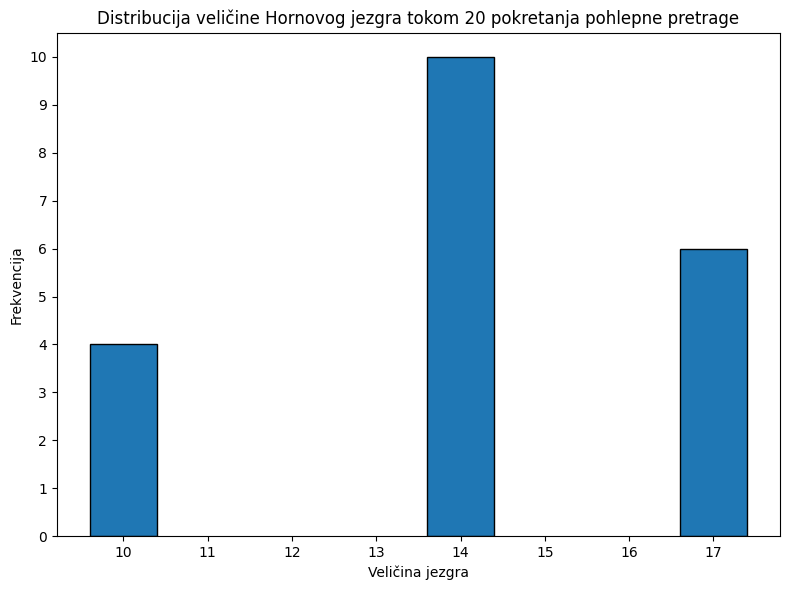


Variable neighborhood results: 
Best core size: 20
Avg core size: 10.85
Total time: 1.5sec
Avg time: 0.075sec
Best core: [(1, 0, 1, 1, 1, 1, 0, 1), (0, 0, 0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 1, 0, 1, 1), (1, 0, 1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 0, 0, 1, 0), (1, 1, 0, 1, 0, 1, 1, 1), (0, 0, 1, 0, 1, 1, 0, 0), (1, 1, 1, 1, 0, 0, 1, 1), (0, 1, 1, 1, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 0, 1, 0, 0), (1, 0, 0, 1, 0, 0, 1, 1), (1, 1, 0, 0, 1, 1, 0, 0), (1, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 0), (1, 0, 1, 0, 1, 0, 0, 1), (1, 1, 0, 0, 1, 0, 0, 1), (0, 1, 1, 0, 0, 1, 0, 1), (0, 0, 1, 0, 1, 0, 1, 0), (0, 0, 1, 0, 0, 1, 1, 1)]


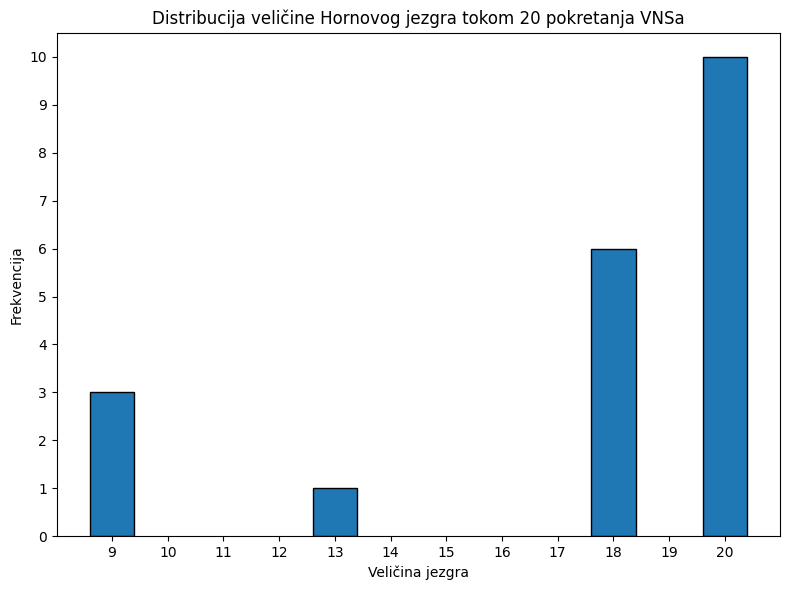

In [166]:
M,n=load_from_file("./TestInstances/TestInstances3.txt")
test_all_large(M,n)

Number of assignments: 330
M: [(0, 1, 1, 1, 0, 0, 0, 0, 1), (0, 0, 1, 0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1, 1, 0, 1), (1, 1, 1, 0, 0, 0, 0, 0, 0), (1, 1, 1, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1, 1, 1, 0), (1, 0, 1, 0, 1, 0, 0, 0, 0), (1, 1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 0, 1, 0, 0, 1, 1, 0), (1, 1, 0, 1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 1, 1, 1, 0), (1, 1, 0, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 1, 0, 1, 0), (0, 1, 0, 1, 0, 0, 1, 0, 1), (1, 1, 0, 1, 0, 1, 0, 1, 0), (0, 1, 1, 1, 0, 0, 1, 0, 1), (1, 1, 0, 0, 1, 0, 0, 1, 0), (1, 1, 0, 1, 1, 1, 0, 1, 1), (1, 0, 0, 1, 0, 0, 0, 1, 0), (1, 1, 0, 1, 1, 0, 1, 1, 0), (0, 0, 1, 1, 0, 0, 1, 1, 1), (1, 1, 0, 0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 1, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0), (1, 0, 1, 0, 1, 0, 1, 0, 0), (1, 0, 0, 1, 1, 1, 1, 1, 0), (1, 0, 1, 1, 0, 1, 1, 0, 1), (1, 0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 0,

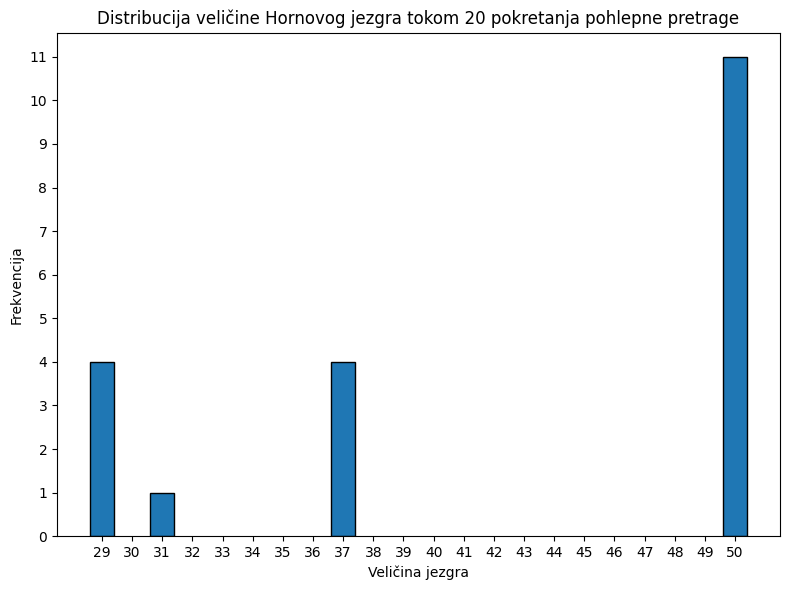


Variable neighborhood results: 
Best core size: 61
Avg core size: 37.05
Total time: 21.122sec
Avg time: 1.056sec
Best core: [(0, 1, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 1, 0, 0, 1, 1, 0), (1, 1, 1, 1, 1, 0, 0, 0, 0), (1, 1, 1, 0, 1, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 0, 1, 0, 1, 1), (0, 1, 1, 0, 0, 1, 0, 1, 0), (0, 1, 0, 0, 1, 1, 0, 1, 0), (0, 1, 1, 1, 0, 0, 0, 1, 0), (1, 1, 0, 0, 0, 0, 0, 1, 1), (0, 1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 0, 1, 0, 1, 1, 0), (0, 1, 0, 0, 0, 0, 1, 0, 0), (1, 1, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 1, 0, 0, 0), (0, 0, 1, 1, 0, 0, 1, 0, 1), (0, 0, 0, 1, 1, 1, 0, 0, 1), (0, 1, 1, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 0, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1, 0, 1, 0), (0, 1, 1, 0, 1, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0, 0, 0, 0), (1, 0, 1, 1, 1, 0, 1, 1, 1), (1, 0, 0, 1, 0, 1, 1, 0, 1), (1, 1, 0, 1, 1, 0, 1, 0, 0), (1, 0, 1, 0, 1, 0, 0, 0, 0), (1, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 1, 0, 1, 0, 1, 1, 0), (0, 

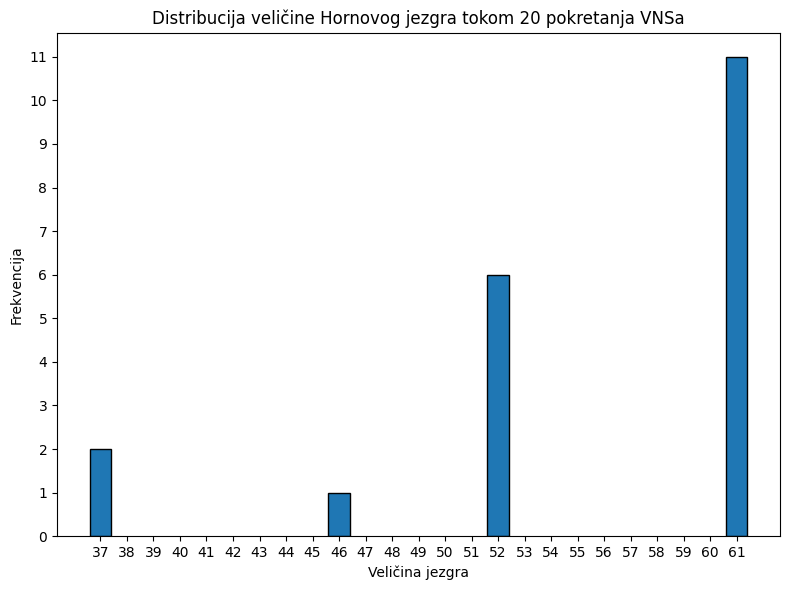

In [170]:
M,n=load_from_file("./TestInstances/TestInstances4.txt")
test_all_large(M,n)

Number of assignments: 221
M: [(0, 0, 1, 1, 1, 0, 1, 0, 1), (0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 1, 1, 1, 0, 1, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 0, 1, 0), (1, 0, 0, 0, 0, 1, 1, 1, 1), (1, 1, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 1, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1, 0, 0, 0), (1, 1, 1, 0, 1, 0, 0, 1, 0), (0, 0, 0, 1, 1, 1, 1, 0, 1), (0, 1, 0, 0, 1, 0, 1, 1, 0), (0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 1, 1, 0, 1, 1), (1, 0, 1, 1, 0, 1, 0, 1, 0), (0, 0, 0, 1, 0, 1, 0, 1, 1), (1, 1, 1, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 1, 1, 0, 0), (1, 0, 1, 0, 0, 0, 0, 1, 1), (1, 1, 1, 1, 0, 1, 0, 0, 0), (0, 1, 1, 1, 1, 1, 0, 1, 1), (0, 1, 1, 0, 0, 0, 1, 1, 1), (0, 0, 1, 1, 0, 1, 0, 0, 0), (0, 1, 1, 0, 1, 0, 1, 1, 0), (0, 0, 1, 1, 1, 0, 0, 0, 1), (1, 0, 0, 1, 0, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1, 1, 1, 1), (1, 1, 0, 0, 1, 0, 1, 1, 0), (1, 0, 1, 0, 0, 1, 1, 1, 0), (0, 1, 1, 1, 0, 1, 0, 0, 1), (0, 1, 1, 1, 1, 0, 0, 0, 1), (1, 1, 1, 1,

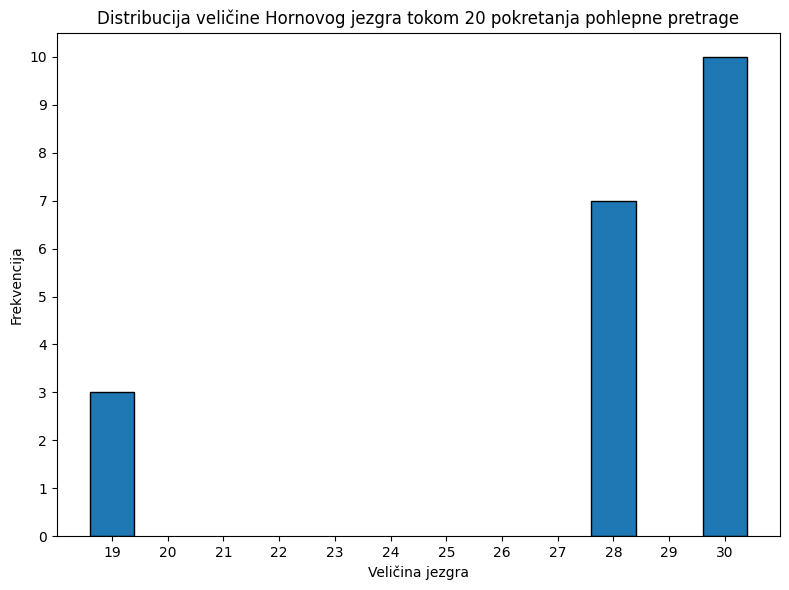


Variable neighborhood results: 
Best core size: 35
Avg core size: 21.7
Total time: 9.335sec
Avg time: 0.467sec
Best core: [(0, 1, 0, 0, 0, 0, 0, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 1), (1, 0, 1, 1, 0, 0, 0, 0, 0), (1, 0, 1, 0, 1, 0, 1, 0, 0), (0, 0, 1, 1, 1, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1, 1, 1, 1), (0, 1, 1, 1, 0, 0, 1, 0, 0), (1, 0, 0, 0, 1, 1, 1, 1, 1), (1, 0, 0, 1, 1, 0, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 1, 1), (0, 1, 1, 0, 0, 0, 0, 0, 1), (0, 1, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 0, 1, 0, 0), (1, 1, 0, 0, 1, 0, 0, 0, 0), (1, 0, 1, 1, 0, 0, 1, 0, 1), (0, 1, 0, 0, 1, 1, 0, 0, 0), (0, 1, 0, 0, 1, 0, 1, 0, 1), (1, 0, 1, 0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 1, 1, 1, 0, 0, 0, 0, 0), (0, 1, 1, 0, 0, 0, 1, 1, 1), (1, 1, 0, 0, 1, 0, 1, 1, 0), (0, 0, 1, 0, 0, 1, 0, 1, 1), (1, 0, 1, 0, 0, 1, 1, 1, 0), (0, 0, 0, 1, 1, 0, 1, 0, 1), (0, 0, 0, 1, 0, 0, 1, 1, 1), (0, 1, 0, 1, 1, 0, 1, 1, 1), (1, 1, 1, 0, 0, 0, 0, 1, 0), (1, 1, 1, 1, 1, 0, 1, 0, 1), (0, 0, 1, 1, 1, 1, 0, 0, 1), (0, 1,

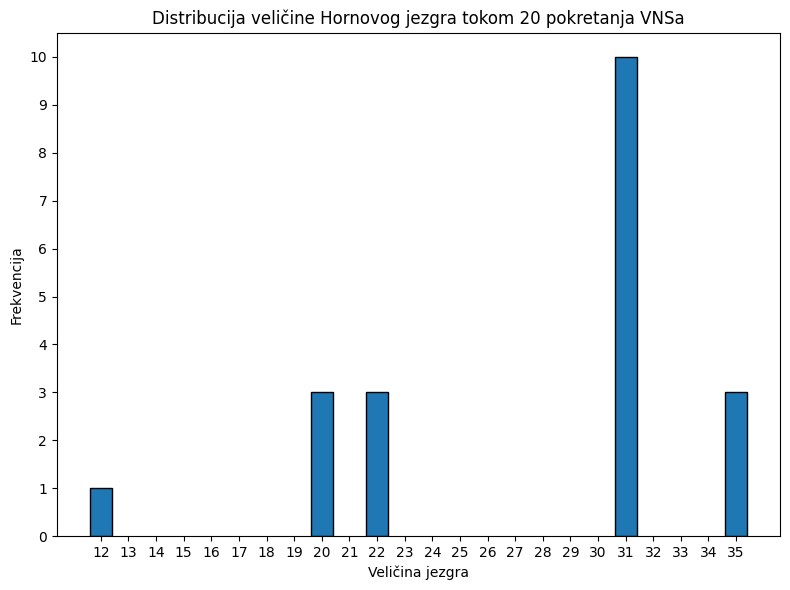

In [227]:
M,n=load_from_file("./TestInstances/TestInstances5.txt")
test_all_large(M,n)

In [258]:
random.seed(42)

In [298]:
def gs_core_size_over_iterations(M,n):
    core,core_sizes=greedy_search(M,n)
    
    plt.figure(figsize=(8, 6))
    iterations=range(1,len(core_sizes)+1)

    plt.plot(iterations, core_sizes, linestyle='-', color='b')
    
    plt.title('Veličina Hornovog jezgra tokom iteracija pohlepne pretrage')
    plt.xlabel('Iteracija')
    plt.ylabel('Veličina jezgra')
    y_ticks = range(int(min(core_sizes)), int(max(core_sizes)) + 1,2)
    plt.yticks(y_ticks)
    
    plt.tight_layout()
    plt.savefig('greedy_performance.png')
    plt.show()
    plt.close()


In [299]:
def vns_core_size_over_iterations(M,n):
    core,core_sizes=variable_neighborhood_search(M,50,5,0.5)

    plt.figure(figsize=(8, 6))
    iterations=range(1,len(core_sizes)+1)

    plt.plot(iterations, core_sizes, linestyle='-', color='b')
    
    plt.title('Veličina Hornovog jezgra tokom iteracija VNSa')
    plt.xlabel('Iteracija')
    plt.ylabel('Veličina jezgra')
    y_ticks = range(int(min(core_sizes)), int(max(core_sizes)) + 1)
    plt.yticks(y_ticks)
    
    plt.tight_layout()
    plt.savefig('vns_performance.png')
    plt.show()
    plt.close()


In [300]:
def test_all_plots(M,n):
    gs_core_size_over_iterations(M,n)
    print("")
    vns_core_size_over_iterations(M,n)

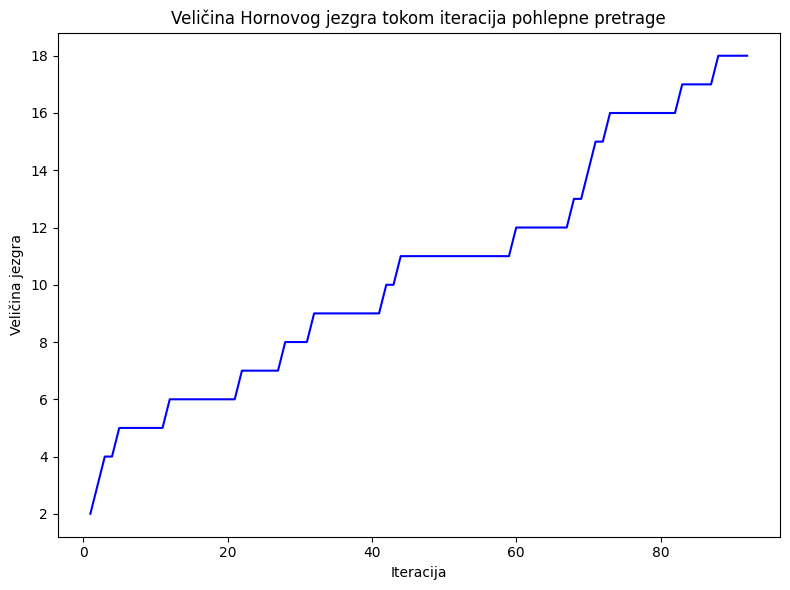

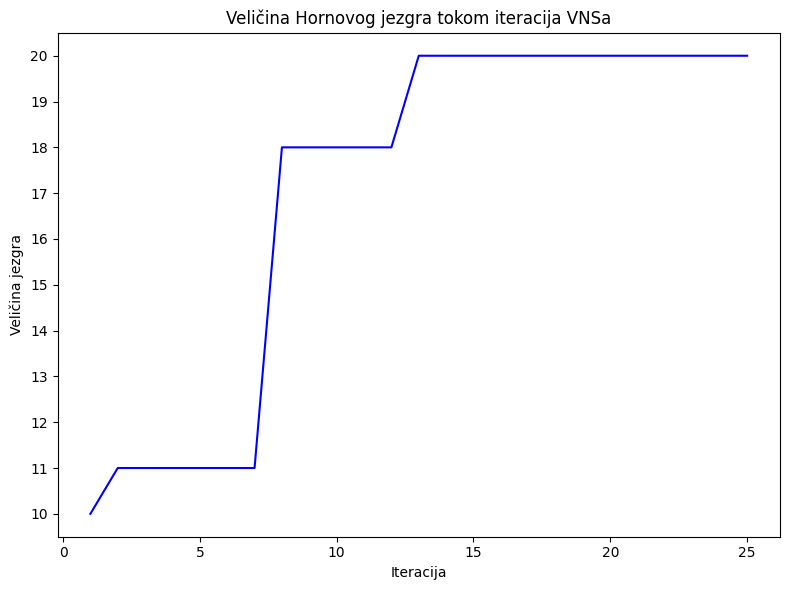

In [312]:
M,n=load_from_file("./TestInstances/TestInstances3.txt")
test_all_plots(M,n)

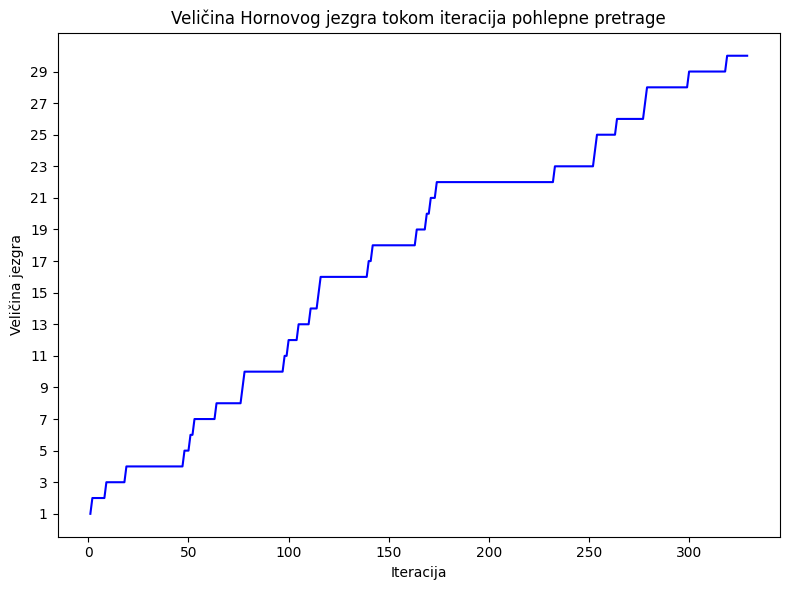

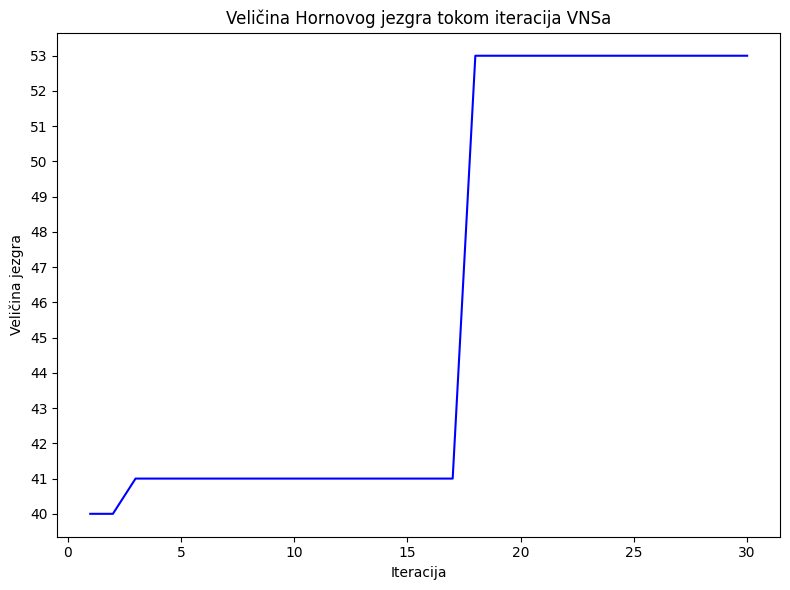

In [315]:
M,n=load_from_file("./TestInstances/TestInstances4.txt")
test_all_plots(M,n)

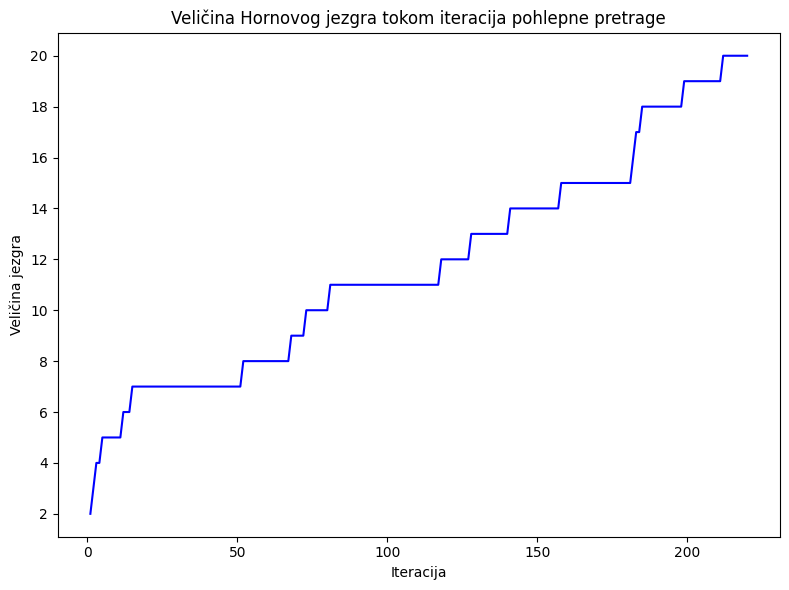

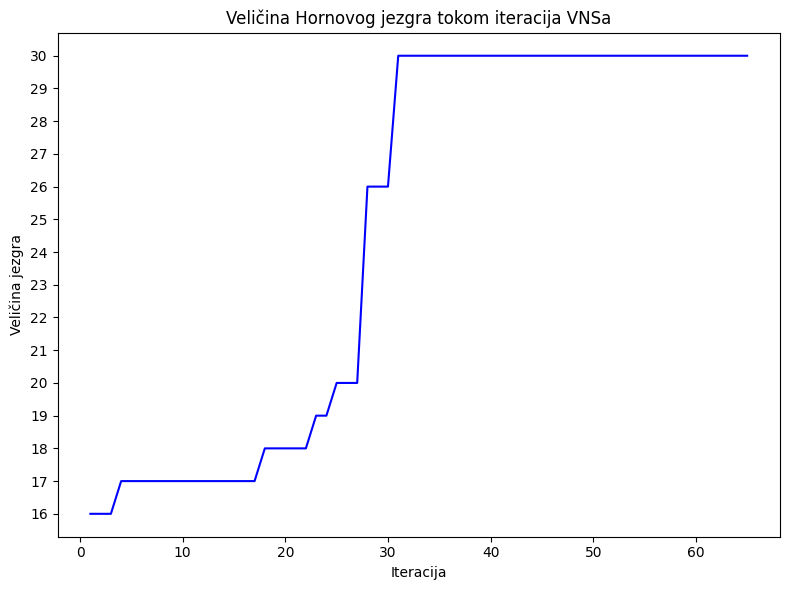

In [316]:
M,n=load_from_file("./TestInstances/TestInstances5.txt")
test_all_plots(M,n)